In [58]:
# Name:Sriram G
# Reg No.212222230149

In [59]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import keras as kf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
X_test.shape

(10000, 28, 28)

In [63]:
single_image= X_train[59999]

In [64]:
single_image.shape

(28, 28)

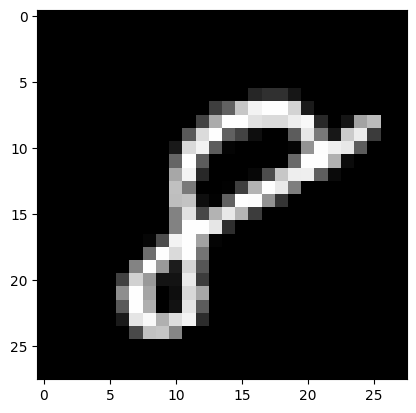

In [65]:
plt.imshow(single_image,cmap='gray')

In [66]:
y_train.shape

(60000,)

In [67]:
X_train.max()

255

In [68]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [69]:
X_train_scaled.min()

0.0

In [70]:
X_train_scaled.max()

1.0

In [71]:
y_train[0]

5

In [72]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [73]:
type(y_train_onehot)

numpy.ndarray

In [74]:
y_train_onehot.shape

(60000, 10)

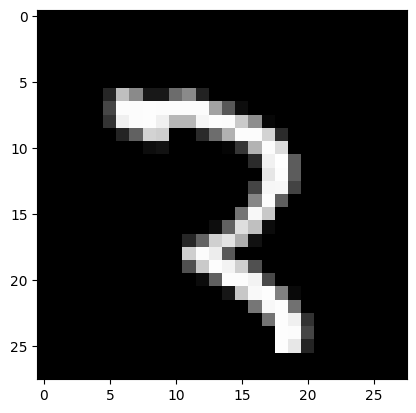

In [75]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [76]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [77]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [78]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(5,5), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                147488    
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                      

In [79]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Epoch 1/5
938/938 [==============================] - 34s 35ms/step - loss: 0.4294 - accuracy: 0.8703 - val_loss: 0.1271 - val_accuracy: 0.9638
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.1074 - accuracy: 0.9701 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0581 - val_accuracy: 0.9815
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.0738 - val_accuracy: 0.9766
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0553 - val_accuracy: 0.9829


In [81]:
metrics = pd.DataFrame(model.history.history)

In [82]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.429371,0.870317,0.127104,0.9638
1,0.107439,0.970083,0.094871,0.9724
2,0.069746,0.979450,0.058125,0.9815
3,0.054903,0.983650,0.073804,0.9766
4,0.045212,0.986017,0.055283,0.9829


<Axes: >

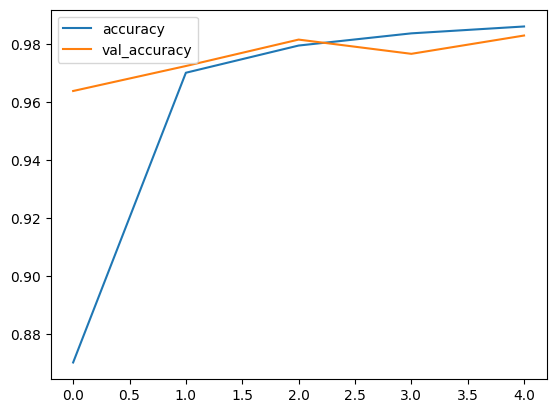

In [83]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

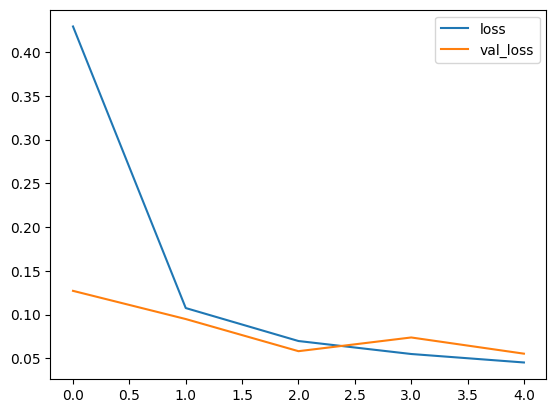

In [84]:
metrics[['loss','val_loss']].plot()

In [85]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [86]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 971    0    2    1    0    0    1    0    4    1]
 [   0 1128    1    2    0    0    1    0    3    0]
 [   2    1 1018    3    3    0    0    3    2    0]
 [   0    0    2 1003    0    1    0    4    0    0]
 [   0    0    1    0  968    0    1    1    2    9]
 [   2    1    1   17    0  866    3    0    2    0]
 [   6    4    1    0    6    5  932    0    4    0]
 [   0    3    7    3    0    0    0 1009    2    4]
 [   7    0    4    5    0    2    0    3  951    2]
 [   3    1    0    9    3    2    0    5    3  983]]


In [87]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [88]:
img = image.load_img('Deep.png')

In [89]:
type(img)

PIL.Image.Image

In [90]:
img = image.load_img('Deep.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [91]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [92]:
print(x_single_prediction)

[2]


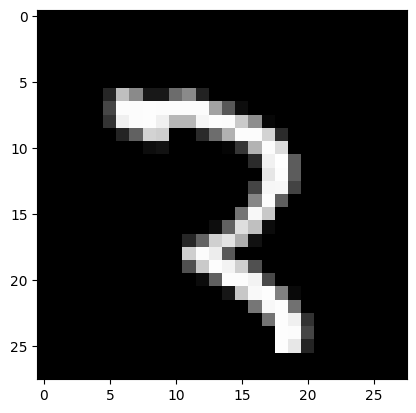

In [93]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [94]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [95]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [96]:
print(x_single_prediction)

[2]
